In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-1/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

****Loading the Dataset and making appropriate X matrix and y vector****

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-1/diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape

(768, 8)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

****Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).****

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])



Training set size: 614
Testing set size: 154


****(c)Give the objective of logistic regression with L2 regularization.****

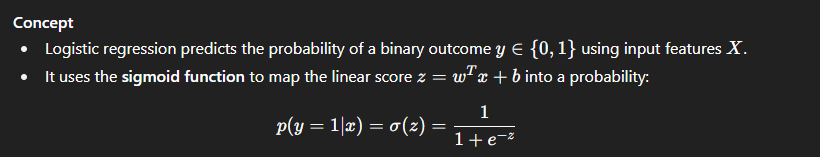
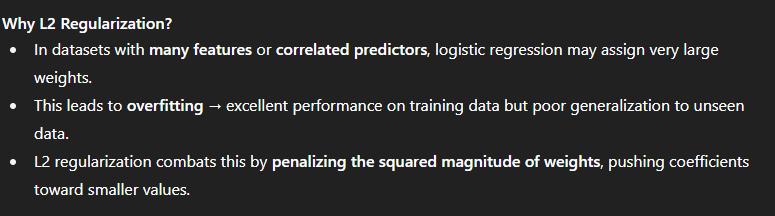
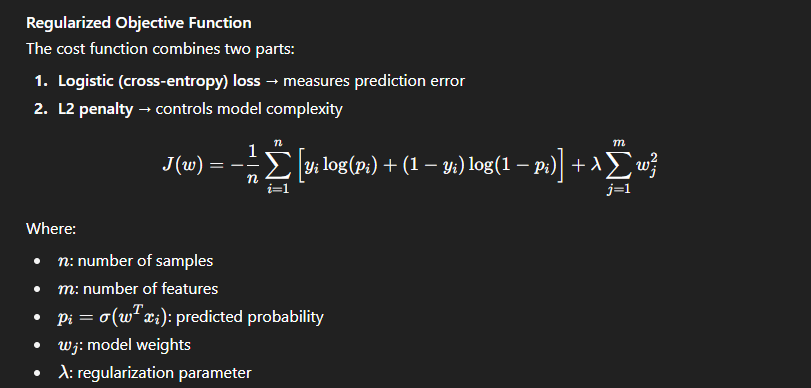

****(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.****


**Cross-Entropy Loss vs λ**

Training loss increases steadily as λ grows because strong regularization restricts the model’s flexibility.

Test loss decreases slightly at first (less overfitting) but rises again for large λ values, showing underfitting.

This illustrates the classic bias–variance tradeoff.

**L2 Norm of Weights vs λ**

The weight vector norm decreases as λ increases.

Stronger penalties push coefficients toward zero, preventing large weights and reducing model complexity.

**Weights vs λ**

Individual feature weights shrink as λ increases.

Some weights drop faster than others, suggesting certain features are less influential once strong regularization is applied.

**Accuracy vs λ**

Training accuracy is highest with very small λ (low regularization) but declines as λ grows.

Test accuracy improves initially (reduced overfitting) and then falls when λ is too large (underfitting).

The best generalization is often at intermediate λ values (e.g., λ = 1 or 10 in this dataset).

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np

lambdas = [0.000001, 0.1, 1, 10, 100, 1000]
train_losses, test_losses = [], []
train_acc, test_acc = [], []
weights = []

for lam in lambdas:
    C_value = 1/lam if lam != 0 else 1e12
    model = LogisticRegression(penalty="l2", C=C_value, solver="lbfgs", max_iter=500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))
    weights.append(model.coef_[0])

weights = np.array(weights)


****Cross-entropy Loss vs λ****

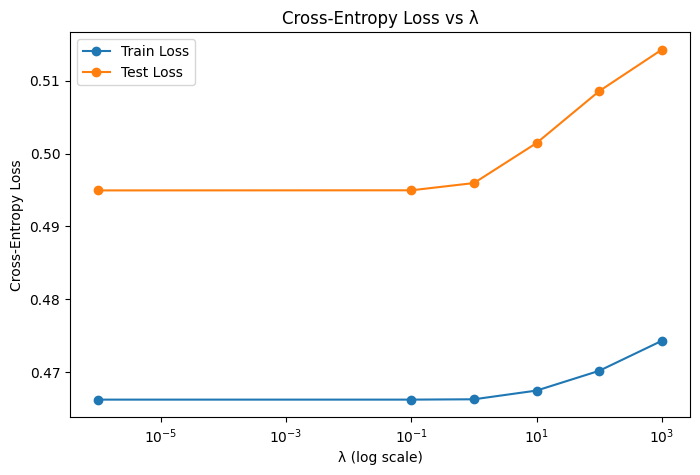

In [7]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs λ")
plt.legend()
plt.show()

****L2 Norm vs λ(Regularization Parameter)****

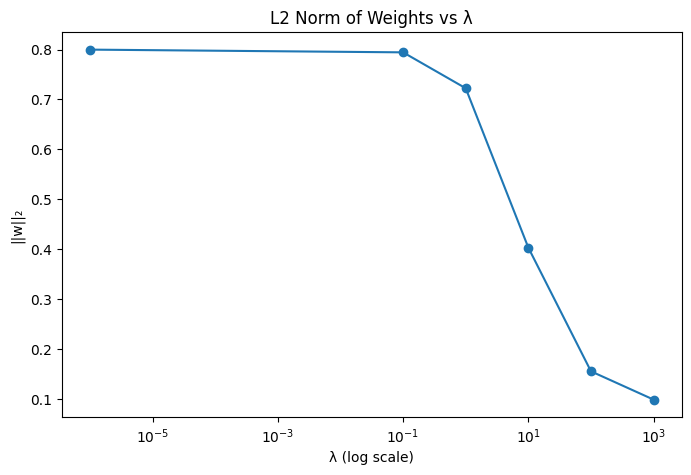

In [8]:
plt.figure(figsize=(8,5))
w_norms = np.linalg.norm(weights, axis=1)
plt.plot(lambdas, w_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 Norm of Weights vs λ")
plt.show()

****# 3. Actual weight values vs λ****

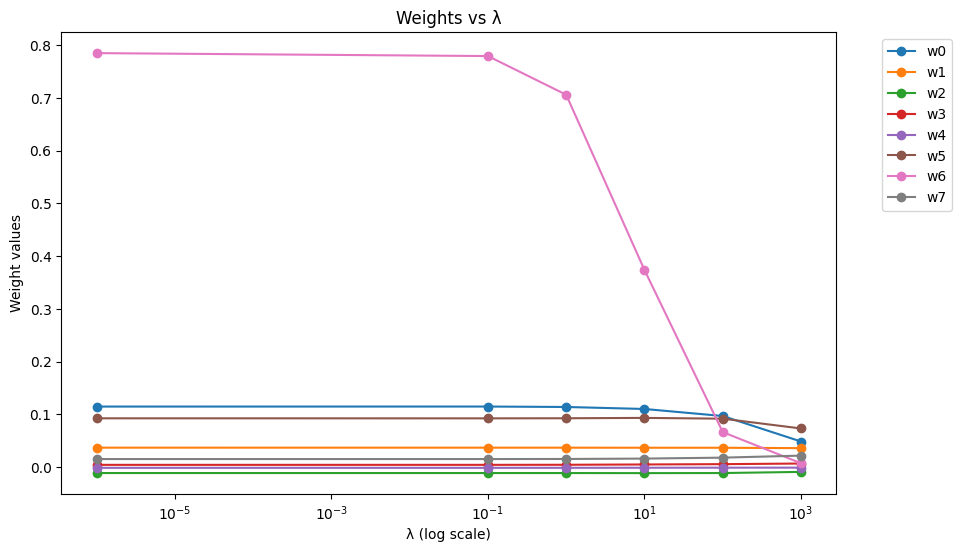

In [9]:
plt.figure(figsize=(10,6))
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:,i], marker='o', label=f"w{i}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight values")
plt.title("Weights vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

****# 4. Accuracy vs λ****

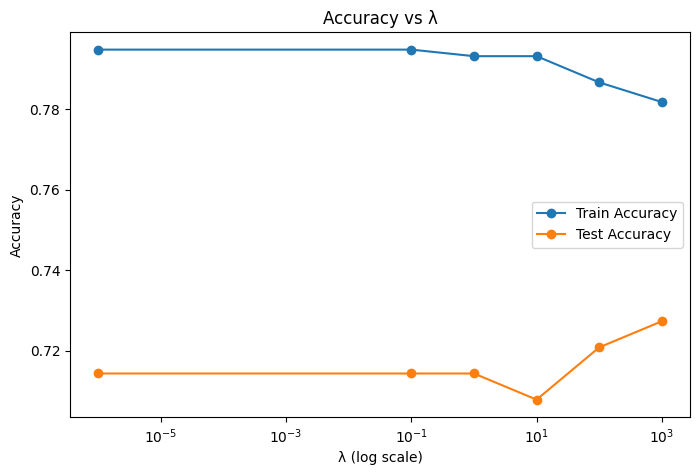

In [10]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_acc, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()


**(e) Re-format the data in the following way: take each of the input variables, and feed it througha set of Gaussian basis functions, defined as follows. For each variable (except the bias term),use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**


**Gaussian Basis Transformation**
* In this part, we reformat the input data by applying Gaussian basis functions to each feature.
    * For each input variable, we generate 5 Gaussian basis functions with means evenly spaced between –10 and 10.
	* The variance of these functions is controlled by σ, and we experiment with σ values of {0.1, 0.5, 1, 5, 10}.
	* This transformation allows the linear model (logistic regression) to capture nonlinear relationships in the data.



In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def gaussian_basis_transform(X, sigma):
    """
    Apply Gaussian basis transformation to each column of X.
    For each feature, generate 5 Gaussian basis functions with means in [-10, 10].
    """
    X_new = []
    mus = np.linspace(-10, 10, 5)  # 5 centers
    
    for col in X.columns:
        for mu in mus:
            X_new.append(np.exp(-(X[col] - mu) ** 2 / (2 * sigma**2)))
    
    X_new = pd.concat(X_new, axis=1)
    X_new.columns = [f"{col}_mu{mu:.1f}_sigma{sigma}" 
                     for col in X.columns for mu in mus]
    
    return X_new


****(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.****


**Effect of σ on Training and Testing Error**
* Here, we train logistic regression without regularization on the transformed features from part (e).
	*  For each σ, we compute the cross-entropy loss on both training and testing data.
	* We also plot constant reference lines showing the errors obtained in part (c) (the baseline with raw features).
*  Explanation of results:
	*  Small σ (e.g., 0.1) produces very narrow Gaussians that act like “spikes”, leading to overfitting: low training error but high testing error.
    * Large σ (e.g., 10) produces very wide Gaussians that blur differences between inputs, causing underfitting: both training and testing errors increase.
	* Medium σ values (e.g., 1 or 5) balance bias and variance, usually giving the best generalization.
* This directly illustrates the bias–variance trade-off:
	* Small σ → high variance, low bias.
	* Large σ → low variance, high bias.



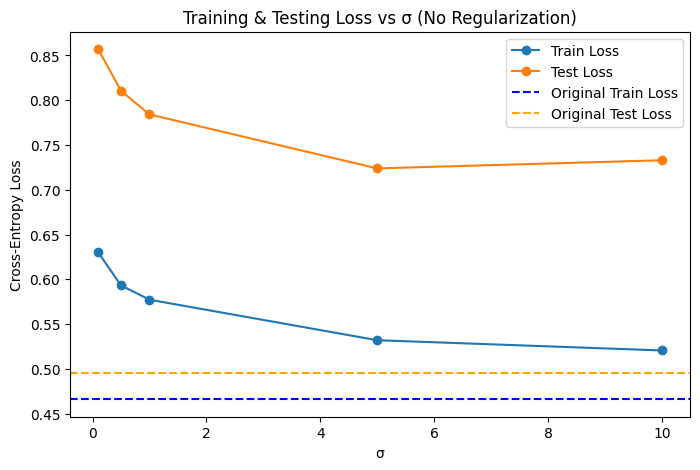

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

sigma_values = [0.1, 0.5, 1, 5, 10]
train_err_sigma, test_err_sigma = [], []

for sigma in sigma_values:
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)

    # Scale features
    scaler = StandardScaler()
    X_train_g = scaler.fit_transform(X_train_g)
    X_test_g = scaler.transform(X_test_g)

    # Logistic regression without regularization
    model = LogisticRegression(
        penalty=None, solver="lbfgs", max_iter=5000
    )
    model.fit(X_train_g, y_train)

    # Cross-entropy losses
    train_loss = log_loss(y_train, model.predict_proba(X_train_g))
    test_loss = log_loss(y_test, model.predict_proba(X_test_g))

    train_err_sigma.append(train_loss)
    test_err_sigma.append(test_loss)

# Plot
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_err_sigma, marker='o', label="Train Loss")
plt.plot(sigma_values, test_err_sigma, marker='o', label="Test Loss")
plt.axhline(y=train_losses[0], color='blue', linestyle='--', label="Original Train Loss")
plt.axhline(y=test_losses[0], color='orange', linestyle='--', label="Original Test Loss")
plt.xlabel("σ")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training & Testing Loss vs σ (No Regularization)")
plt.legend()
plt.show()


****(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.****

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


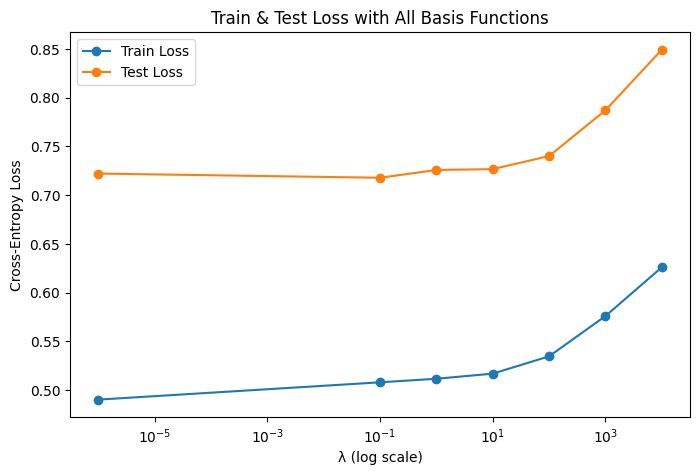

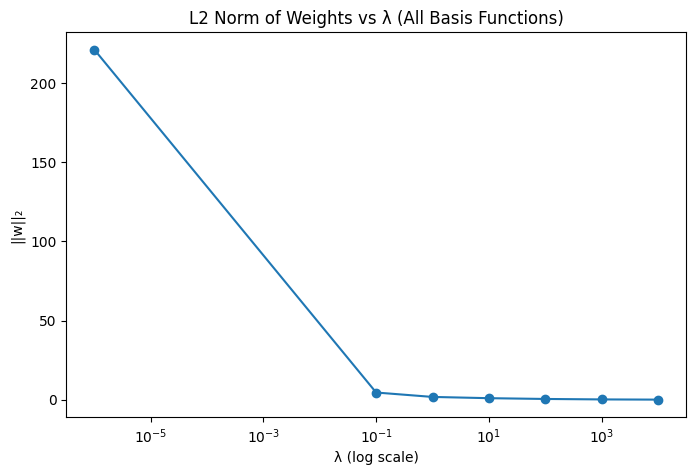

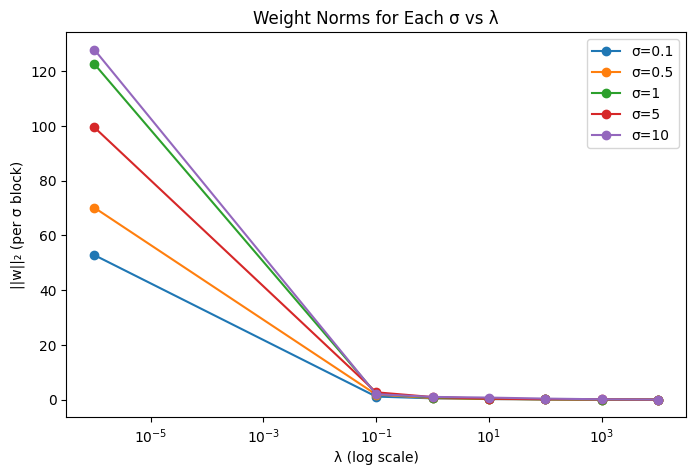

In [13]:
lambdas_extended = [0.000001, 0.1, 1, 10, 100, 1000, 10000]
train_losses_all, test_losses_all, w_norms_all = [], [], []
w_norms_per_sigma = {sigma: [] for sigma in sigma_values}

# Combine all sigma basis features
X_train_all, X_test_all = [], []
for sigma in sigma_values:
    X_train_all.append(gaussian_basis_transform(X_train, sigma))
    X_test_all.append(gaussian_basis_transform(X_test, sigma))

X_train_all = pd.concat(X_train_all, axis=1)
X_test_all = pd.concat(X_test_all, axis=1)

# Scale combined features
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

block_size = X_train.shape[1] * 5  

for lam in lambdas_extended:
    C_value = 1/lam if lam != 0 else 1e12

    model = LogisticRegression(
        penalty="l2", C=C_value, solver="lbfgs", max_iter=7000
    )
    model.fit(X_train_all, y_train)

    # Losses
    train_losses_all.append(log_loss(y_train, model.predict_proba(X_train_all)))
    test_losses_all.append(log_loss(y_test, model.predict_proba(X_test_all)))

    # Weight norms
    w = model.coef_[0]
    w_norms_all.append(np.linalg.norm(w))

    # Norms per σ (split into blocks)
    for i, sigma in enumerate(sigma_values):
        block = w[i*block_size:(i+1)*block_size]
        w_norms_per_sigma[sigma].append(np.linalg.norm(block))

# --- Plots ---
# 1. Train/Test loss
plt.figure(figsize=(8,5))
plt.plot(lambdas_extended, train_losses_all, marker='o', label="Train Loss")
plt.plot(lambdas_extended, test_losses_all, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train & Test Loss with All Basis Functions")
plt.legend()
plt.show()

# 2. Overall L2 norm
plt.figure(figsize=(8,5))
plt.plot(lambdas_extended, w_norms_all, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 Norm of Weights vs λ (All Basis Functions)")
plt.show()

# 3. Norms per σ
plt.figure(figsize=(8,5))
for sigma in sigma_values:
    plt.plot(lambdas_extended, w_norms_per_sigma[sigma], marker='o', label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂ (per σ block)")
plt.title("Weight Norms for Each σ vs λ")
plt.legend()
plt.show()



**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functionsthat capture relationships between the inputs. Explain the impact of this choice onthe bias-variance trade-off.**

**Designing Gaussian Basis for Interactions**
  * So far, we applied univariate Gaussian basis functions (one per input variable).
  * If we wanted to capture relationships between inputs (i.e., interactions, not just individual effects), we would use multivariate   Gaussian basis functions:
  * 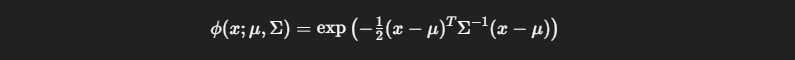
 
* where:
    *   x is the full input vector,
    * 	μ is the mean vector (center),
    * 	Σ is the covariance matrix controlling the shape and orientation.
* Key points:
   *    These basis functions can capture correlations between features.
   * 	They increase model capacity (the model can represent more complex decision boundaries).
   * 	This reduces bias but increases variance, meaning the model is more flexible but also more prone to overfitting.
   * 	Therefore, careful regularization (e.g., L2 penalty, cross-validation for λ) is needed to control complexity.


